In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/06_Jun.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,56.000000,1,5,1,2705.0,2754.0,2786.0,2721.0,3006.0,2313.0,2709.083333,2634.0
1,25.916667,56.416667,1,5,1,2675.0,2746.0,2768.0,2686.0,2974.0,2307.0,2692.750000,2572.0
2,25.833333,56.833333,1,5,1,2653.0,2720.0,2731.0,2673.0,2969.0,2340.0,2678.083333,2555.0
3,25.750000,57.250000,1,5,1,2640.0,2698.0,2785.0,2644.0,2950.0,2361.0,2657.166667,2534.0
4,25.666667,57.666667,2,5,1,2634.0,2705.0,2754.0,2620.0,2918.0,2299.0,2637.583333,2519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,35.122450,45.925632,23,1,0,3617.0,3511.0,3446.0,3798.0,3313.0,3766.0,3555.500000,3645.0
8636,35.122450,45.925632,24,1,0,3632.0,3492.0,3457.0,3695.0,3410.0,3745.0,3576.166667,3705.0
8637,35.122450,45.925632,24,1,0,3622.0,3548.0,3436.0,3696.0,3484.0,3769.0,3601.000000,3734.0
8638,35.000000,45.925632,24,1,0,3648.0,3591.0,3467.0,3675.0,3565.0,3824.0,3626.333333,3771.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040


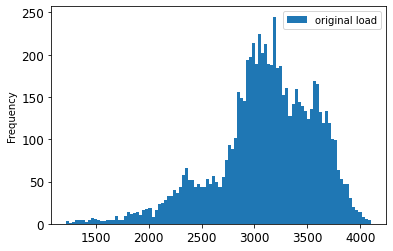

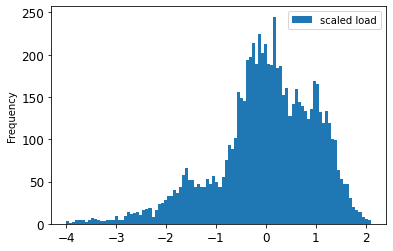

In [8]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

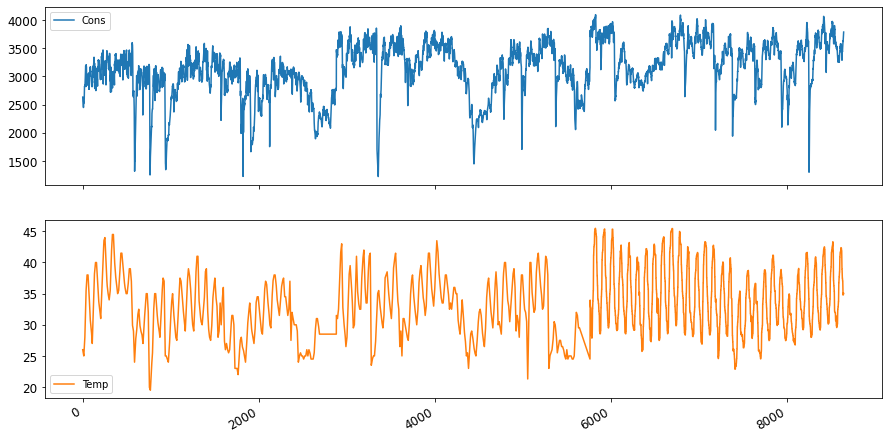

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163,-0.538286
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771,-0.567988
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746,-0.576475
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346,-0.561624
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040,-0.612541
5,-1.255373,-1.398412,0.279187,-1.516446,0.423061,0.644431,-1.136505,-0.919049,-0.769835,-1.112979,-0.587475,-1.828348,-1.068825,-0.555259
6,-1.310534,-1.414548,0.299699,-1.516446,0.423061,0.644431,-1.172531,-0.965616,-0.824808,-1.112979,-0.537608,-1.784054,-1.110610,-0.500098
7,-1.372059,-1.430683,0.320212,-1.516446,0.423061,0.644431,-1.217035,-0.993133,-0.871323,-1.144747,-0.693714,-1.775195,-1.153667,-0.474640
8,-1.397517,-1.446819,0.340724,-1.372000,0.423061,0.644431,-1.248823,-1.005833,-0.856522,-1.278174,-0.663360,-1.830563,-1.200176,-0.553137
9,-1.372059,-1.462955,0.361236,-1.372000,0.423061,0.644431,-1.255180,-1.137067,-0.919952,-1.803410,-0.695882,-1.728686,-1.239054,-0.606176


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163,-0.538286
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771,-0.567988
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746,-0.576475
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346,-0.561624
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040,-0.612541
5,-1.255373,-1.398412,0.279187,-1.516446,0.423061,0.644431,-1.136505,-0.919049,-0.769835,-1.112979,-0.587475,-1.828348,-1.068825,-0.555259
6,-1.310534,-1.414548,0.299699,-1.516446,0.423061,0.644431,-1.172531,-0.965616,-0.824808,-1.112979,-0.537608,-1.784054,-1.110610,-0.500098
7,-1.372059,-1.430683,0.320212,-1.516446,0.423061,0.644431,-1.217035,-0.993133,-0.871323,-1.144747,-0.693714,-1.775195,-1.153667,-0.474640
8,-1.397517,-1.446819,0.340724,-1.372000,0.423061,0.644431,-1.248823,-1.005833,-0.856522,-1.278174,-0.663360,-1.830563,-1.200176,-0.553137
9,-1.372059,-1.462955,0.361236,-1.372000,0.423061,0.644431,-1.255180,-1.137067,-0.919952,-1.803410,-0.695882,-1.728686,-1.239054,-0.606176


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7191,-0.419479,-0.064485,-0.741877,1.372462,1.414104,-1.551757,-0.837696,-1.973153,0.086465,1.326828,1.173059,1.055187,-0.923122,NaN
7192,-0.370683,-0.064485,-0.741877,1.516907,1.414104,-1.551757,-0.693590,-2.248321,0.014578,1.301414,1.194741,1.106125,-0.956550,NaN
7193,-0.387656,-0.064485,-0.741877,1.516907,1.414104,-1.551757,-0.572795,-1.594269,-0.194740,1.309885,1.105847,1.061831,-0.973446,NaN
7194,-0.430087,-0.129351,-0.732232,1.516907,1.414104,-1.551757,-0.479549,-1.088383,-0.678919,1.333182,1.173059,1.092836,-0.952371,NaN
7195,-0.186108,-0.194216,-0.722587,1.516907,1.414104,-1.551757,-0.420211,-0.838616,-1.972884,1.341653,1.268458,1.172566,-0.799220,NaN
7196,-0.071544,-0.194216,-0.722587,1.661353,1.414104,-1.551757,-0.371470,-0.694682,-2.247746,1.314121,1.270626,1.201357,-0.612640,NaN
7197,0.013319,-0.194216,-0.722587,1.661353,1.414104,-1.551757,-0.388423,-0.574031,-1.594421,1.377657,1.251112,1.121628,-0.474931,NaN
7198,0.096059,-0.242623,-0.722587,1.661353,1.414104,-1.551757,-0.430807,-0.480898,-1.089098,1.335300,1.222926,1.185854,-0.373556,NaN
7199,0.159706,-0.242623,-0.712849,1.661353,1.414104,-1.551757,-0.187098,-0.421631,-0.839608,1.333182,1.290139,1.168136,-0.288169,NaN
7200,0.202137,-0.242623,-0.712849,-1.660891,-1.559024,-1.551757,-0.072661,-0.372947,-0.695834,1.356479,1.240272,1.148204,-0.211503,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7091,1.262916,0.349879,-1.163061,1.228016,0.918583,0.644431,1.192508,1.115075,1.598205,1.180694,1.001776,1.325380,1.252068,-0.419479
7092,1.335049,0.349879,-1.163061,1.372462,0.918583,0.644431,1.279395,0.996541,1.488261,1.252702,1.131864,1.416182,1.238079,-0.370683
7093,1.335049,0.349879,-1.163061,1.372462,0.918583,0.644431,1.285753,1.030408,1.393116,1.254820,1.129696,1.460476,1.232265,-0.387656
7094,1.436884,0.244352,-1.082684,1.372462,0.918583,0.644431,1.287872,1.002891,1.249342,1.273881,1.110183,1.582284,1.247526,-0.430087
7095,1.373237,0.138824,-1.002307,1.372462,0.918583,0.644431,1.260323,1.189158,1.111911,1.195519,1.066820,1.537990,1.269145,-0.186108
7096,1.347779,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.275942,0.993509,1.216698,1.116687,1.577855,1.298758,-0.071544
7097,1.356265,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.282292,1.027338,1.129865,1.073324,1.622149,1.326191,0.013319
7098,1.379602,0.005221,-0.885408,1.516907,0.918583,0.644431,1.434098,1.284409,0.999852,1.195519,1.103678,1.566781,1.357984,0.096059
7099,1.388088,-0.128382,-0.768510,1.516907,0.918583,0.644431,1.370522,1.256892,1.185913,1.288706,1.181732,1.595573,1.374516,0.159706
7100,1.360508,-0.128382,-0.768510,1.661353,0.918583,0.644431,1.345091,1.328859,1.272600,1.290824,1.209918,1.568996,1.381238,0.202137


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-0.538286
1,-0.567988
2,-0.576475
3,-0.561624
4,-0.612541
...,...
7096,-0.071544
7097,0.013319
7098,0.096059
7099,0.159706


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,1.347779,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.275942,0.993509,1.216698,1.116687,1.577855,1.298758
7097,1.356265,0.138824,-1.002307,1.516907,0.918583,0.644431,1.332376,1.282292,1.027338,1.129865,1.073324,1.622149,1.326191
7098,1.379602,0.005221,-0.885408,1.516907,0.918583,0.644431,1.434098,1.284409,0.999852,1.195519,1.103678,1.566781,1.357984
7099,1.388088,-0.128382,-0.768510,1.516907,0.918583,0.644431,1.370522,1.256892,1.185913,1.288706,1.181732,1.595573,1.374516


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,3151.0,31.552450,37.932150,1.0,1.0,0.0,3114.0,2925.0,2838.0,3760.0,3694.0,3615.0,3037.750000
7202,3147.0,30.657450,41.562784,1.0,1.0,0.0,3153.0,2905.0,2882.0,3743.0,3656.0,3543.0,3059.833333
7203,3181.0,29.762451,45.193417,1.0,1.0,0.0,3183.0,3020.0,2910.0,3739.0,3637.0,3592.0,3082.416667
7204,3188.0,29.762451,45.193417,2.0,1.0,0.0,3203.0,3074.0,2933.0,3727.0,3634.0,3560.0,3103.666667
7205,3211.0,29.762451,45.193417,2.0,1.0,0.0,3151.0,3114.0,2925.0,3682.0,3613.0,3546.0,3127.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,3604.0,32.472450,59.832810,24.0,3.0,1.0,3591.0,3558.0,3514.0,3214.0,3052.0,3665.0,3575.250000
8158,3645.0,32.302452,59.832810,24.0,3.0,1.0,3611.0,3566.0,3482.0,3253.0,3079.0,3717.0,3588.833333
8159,3642.0,32.302452,59.903473,24.0,3.0,1.0,3627.0,3616.0,3528.0,3232.0,3100.0,3746.0,3598.333333
8160,3624.0,32.302452,59.903473,1.0,4.0,1.0,3601.0,3583.0,3536.0,3218.0,3099.0,3769.0,3605.666667


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,0.841318,0.574042,-0.274688
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,0.887640,0.539568,-0.226666
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,0.781373,0.493603,-0.188199
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,0.740501,0.398800,-0.162718
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,0.664207,0.384436,-0.158552


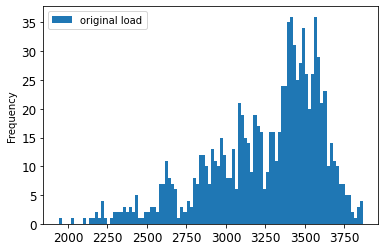

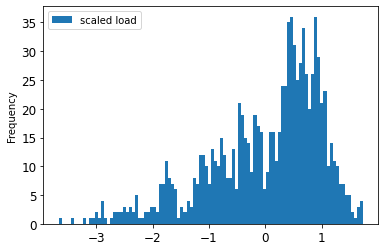

In [19]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234,0.687014
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306,0.510797
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908,0.664637
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430,0.642261
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357,0.449260
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,0.841318,0.574042,-0.274688,0.589116
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,0.887640,0.539568,-0.226666,0.547159
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,0.781373,0.493603,-0.188199,0.513594
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,0.740501,0.398800,-0.162718,0.345767
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,0.664207,0.384436,-0.158552,0.387724


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234,0.687014
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306,0.510797
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908,0.664637
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430,0.642261
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357,0.449260
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,0.841318,0.574042,-0.274688,0.589116
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,0.887640,0.539568,-0.226666,0.547159
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,0.781373,0.493603,-0.188199,0.513594
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,0.740501,0.398800,-0.162718,0.345767
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,0.664207,0.384436,-0.158552,0.387724


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8052,-0.336727,-0.620855,0.874889,1.372873,-0.717211,0.652546,-0.368486,-0.653287,-0.622611,-0.941909,0.639684,0.091410,-0.537585,0.930363
8053,-0.319944,-0.620855,0.874889,1.372873,-0.717211,0.652546,-0.390912,-0.776747,-0.678723,-0.915245,0.636959,0.137375,-0.504509,0.952739
8054,-0.180089,-0.678941,0.928494,1.372873,-0.717211,0.652546,-0.416142,-0.585945,-0.628222,-0.885914,0.876741,0.370072,-0.463592,1.008682
8055,-0.166103,-0.737028,0.982099,1.372873,-0.717211,0.652546,-0.362879,-0.375503,-0.546861,-0.885914,0.887640,0.378691,-0.428555,1.053435
8056,-0.166103,-0.737028,0.982099,1.517204,-0.717211,0.652546,-0.332043,-0.361473,-0.645056,-0.928577,0.868566,0.312616,-0.384943,0.980710
8057,-0.188480,-0.737028,0.982099,1.517204,-0.717211,0.652546,-0.315223,-0.383921,-0.768501,-0.923244,0.822245,0.223559,-0.332511,0.989102
8058,-0.157712,-0.771657,1.017177,1.517204,-0.717211,0.652546,-0.175059,-0.409174,-0.577722,-0.821919,0.917613,0.272397,-0.294044,1.103783
8059,-0.124147,-0.806286,1.052255,1.517204,-0.717211,0.652546,-0.161042,-0.355862,-0.367305,-0.773923,0.939411,0.390182,-0.271013,1.095392
8060,-0.163306,-0.806286,1.052255,1.661535,-0.717211,0.652546,-0.161042,-0.324997,-0.353277,-0.653933,0.923062,0.344217,-0.252637,1.045044
8061,-0.101770,-0.806286,1.052255,1.661535,-0.717211,0.652546,-0.183469,-0.308161,-0.375721,-0.560607,0.887640,0.395928,-0.226911,0.986305


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7201,0.687014
7202,0.510797
7203,0.664637
7204,0.642261
7205,0.449260
...,...
8057,0.989102
8058,1.103783
8059,1.095392
8060,1.045044


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,-0.188480,-0.737028,0.982099,1.517204,-0.717211,0.652546,-0.315223,-0.383921,-0.768501,-0.923244,0.822245,0.223559,-0.332511
8058,-0.157712,-0.771657,1.017177,1.517204,-0.717211,0.652546,-0.175059,-0.409174,-0.577722,-0.821919,0.917613,0.272397,-0.294044
8059,-0.124147,-0.806286,1.052255,1.517204,-0.717211,0.652546,-0.161042,-0.355862,-0.367305,-0.773923,0.939411,0.390182,-0.271013
8060,-0.163306,-0.806286,1.052255,1.661535,-0.717211,0.652546,-0.161042,-0.324997,-0.353277,-0.653933,0.923062,0.344217,-0.252637


In [26]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
24/24 [==============================] - 0s 10ms/step - loss: 1.4333 - val_loss: 1.5168
Epoch 2/300
24/24 [==============================] - 0s 3ms/step - loss: 1.4316 - val_loss: 1.5151
Epoch 3/300
24/24 [==============================] - 0s 3ms/step - loss: 1.4298 - val_loss: 1.5133
Epoch 4/300
24/24 [==============================] - 0s 3ms/step - loss: 1.4281 - val_loss: 1.5116
Epoch 5/300
24/24 [==============================] - 0s 3ms/step - loss: 1.4263 - val_loss: 1.5098
Epoch 6/300
24/24 [==============================] - 0s 2ms/step - loss: 1.4246 - val_loss: 1.5081
Epoch 7/300
24/24 [==============================] - 0s 2ms/step - loss: 1.4228 - val_loss: 1.5064
Epoch 8/300
24/24 [==============================] - 0s 2ms/step - loss: 1.4211 - val_loss: 1.5046
Epoch 9/300
24/24 [==============================] - 0s 2ms/step - loss: 1.4193 - val_loss: 1.5029
Epoch 10/300
24/24 [==============================] - 0s 2ms/step - loss: 1.4176 - val_loss: 1.5012
Epoch 11

24/24 [==============================] - 0s 2ms/step - loss: 1.1877 - val_loss: 1.2768
Epoch 165/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1865 - val_loss: 1.2757
Epoch 166/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1854 - val_loss: 1.2746
Epoch 167/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1843 - val_loss: 1.2735
Epoch 168/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1831 - val_loss: 1.2724
Epoch 169/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1820 - val_loss: 1.2714
Epoch 170/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2703
Epoch 171/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1798 - val_loss: 1.2693
Epoch 172/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1787 - val_loss: 1.2682
Epoch 173/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1776 - val_loss: 1.2672
Epoc

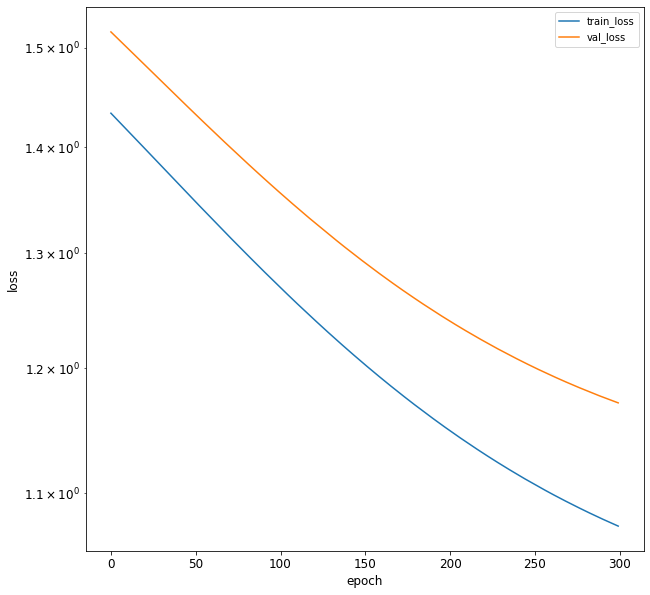

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,3572.0,31.667452,62.221236,1.0,4.0,1.0,3645.0,3611.0,3566.0,3223.0,3119.0,3776.0,3609.916667
8163,3529.0,31.032452,64.539000,1.0,4.0,1.0,3642.0,3627.0,3616.0,3215.0,3129.0,3753.0,3602.666667
8164,3548.0,31.032452,64.539000,2.0,4.0,1.0,3624.0,3601.0,3583.0,3183.0,3113.0,3732.0,3599.750000
8165,3538.0,31.032452,64.539000,2.0,4.0,1.0,3603.0,3604.0,3591.0,3158.0,3107.0,3696.0,3595.333333
8166,3519.0,31.007451,66.080650,2.0,4.0,1.0,3572.0,3645.0,3611.0,3127.0,2996.0,3674.0,3587.666667
8167,3491.0,30.982450,67.622300,2.0,4.0,1.0,3529.0,3642.0,3627.0,3107.0,3058.0,3656.0,3576.333333
8168,3472.0,30.982450,67.622300,3.0,4.0,1.0,3548.0,3624.0,3601.0,3081.0,3066.0,3632.0,3565.583333
8169,3481.0,30.982450,67.622300,3.0,4.0,1.0,3538.0,3603.0,3604.0,3061.0,3046.0,3602.0,3555.333333
8170,3453.0,30.312450,67.987480,3.0,4.0,1.0,3519.0,3572.0,3645.0,3052.0,3042.0,3605.0,3539.333333
8171,3400.0,29.642450,68.352660,3.0,4.0,1.0,3491.0,3529.0,3642.0,3021.0,2987.0,3623.0,3519.166667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


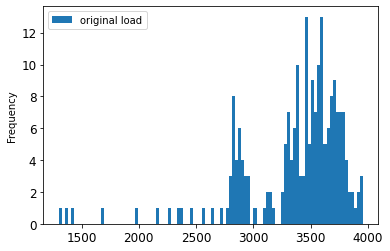

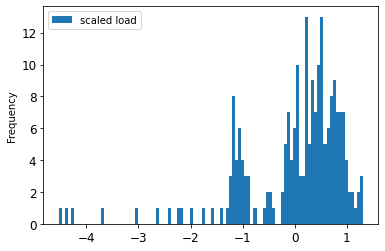

In [33]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,0.465474,-0.556642,1.031488,-1.498364,-1.004934,0.0,0.623248,0.545068,0.445888,-0.148456,-0.096212,1.997397,0.604636,-1.246365
8163,0.370861,-0.698857,1.182558,-1.498364,-1.004934,0.0,0.616655,0.580188,0.555619,-0.166678,-0.066969,1.935974,0.586968,-1.186957
8164,0.412667,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.577094,0.523119,0.483197,-0.239566,-0.113757,1.879893,0.579861,-1.164954
8165,0.390664,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.530941,0.529704,0.500754,-0.296509,-0.131303,1.783753,0.569097,-1.149552
8166,0.348858,-0.704456,1.283042,-1.357685,-1.004934,0.0,0.462809,0.619697,0.544646,-0.367119,-0.455899,1.725001,0.550414,-1.094544
8167,0.287249,-0.710056,1.383525,-1.357685,-1.004934,0.0,0.368303,0.613112,0.579760,-0.412674,-0.274593,1.676931,0.522795,-1.079142
8168,0.245443,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.410061,0.573603,0.522700,-0.471896,-0.251199,1.612838,0.496598,-1.098945
8169,0.265246,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.388083,0.527509,0.529284,-0.517450,-0.309684,1.532721,0.471620,-1.186957
8170,0.203637,-0.860109,1.407327,-1.217006,-1.004934,0.0,0.346325,0.459465,0.619264,-0.537950,-0.321382,1.540733,0.432628,-1.184757
8171,0.087021,-1.010163,1.431129,-1.217006,-1.004934,0.0,0.284787,0.365082,0.612680,-0.608560,-0.482217,1.588803,0.383483,-1.180356


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,0.465474,-0.556642,1.031488,-1.498364,-1.004934,0.0,0.623248,0.545068,0.445888,-0.148456,-0.096212,1.997397,0.604636,-1.246365
8163,0.370861,-0.698857,1.182558,-1.498364,-1.004934,0.0,0.616655,0.580188,0.555619,-0.166678,-0.066969,1.935974,0.586968,-1.186957
8164,0.412667,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.577094,0.523119,0.483197,-0.239566,-0.113757,1.879893,0.579861,-1.164954
8165,0.390664,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.530941,0.529704,0.500754,-0.296509,-0.131303,1.783753,0.569097,-1.149552
8166,0.348858,-0.704456,1.283042,-1.357685,-1.004934,0.0,0.462809,0.619697,0.544646,-0.367119,-0.455899,1.725001,0.550414,-1.094544
8167,0.287249,-0.710056,1.383525,-1.357685,-1.004934,0.0,0.368303,0.613112,0.579760,-0.412674,-0.274593,1.676931,0.522795,-1.079142
8168,0.245443,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.410061,0.573603,0.522700,-0.471896,-0.251199,1.612838,0.496598,-1.098945
8169,0.265246,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.388083,0.527509,0.529284,-0.517450,-0.309684,1.532721,0.471620,-1.186957
8170,0.203637,-0.860109,1.407327,-1.217006,-1.004934,0.0,0.346325,0.459465,0.619264,-0.537950,-0.321382,1.540733,0.432628,-1.184757
8171,0.087021,-1.010163,1.431129,-1.217006,-1.004934,0.0,0.284787,0.365082,0.612680,-0.608560,-0.482217,1.588803,0.383483,-1.180356


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8269,-1.186957,-1.381937,1.113517,-1.076327,0.516823,0.0,-1.150379,-1.261379,-1.399796,0.213705,-0.517309,-0.096316,-1.297196,0.447872
8270,-1.184757,-1.379698,1.140597,-1.076327,0.516823,0.0,-1.095434,-1.248210,-1.239588,0.186372,-0.581643,-0.144386,-1.292322,0.474275
8271,-1.180356,-1.377458,1.167677,-1.076327,0.516823,0.0,-1.080049,-1.188946,-1.167166,0.209149,-0.748327,-0.112340,-1.293743,0.463274
8272,-1.109946,-1.377458,1.167677,-0.935648,0.516823,0.0,-1.099830,-1.166996,-1.151803,0.204594,-0.683993,-0.072281,-1.290088,0.529283
8273,-1.112147,-1.377458,1.167677,-0.935648,0.516823,0.0,-1.187742,-1.151632,-1.261535,0.159039,-0.730781,-0.080293,-1.276482,0.439070


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8162,-1.246365
8163,-1.186957
8164,-1.164954
8165,-1.149552
8166,-1.094544
...,...
8269,0.447872
8270,0.474275
8271,0.463274
8272,0.529283


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,0.465474,-0.556642,1.031488,-1.498364,-1.004934,0.0,0.623248,0.545068,0.445888,-0.148456,-0.096212,1.997397,0.604636
8163,0.370861,-0.698857,1.182558,-1.498364,-1.004934,0.0,0.616655,0.580188,0.555619,-0.166678,-0.066969,1.935974,0.586968
8164,0.412667,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.577094,0.523119,0.483197,-0.239566,-0.113757,1.879893,0.579861
8165,0.390664,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.530941,0.529704,0.500754,-0.296509,-0.131303,1.783753,0.569097
8166,0.348858,-0.704456,1.283042,-1.357685,-1.004934,0.0,0.462809,0.619697,0.544646,-0.367119,-0.455899,1.725001,0.550414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.186957,-1.381937,1.113517,-1.076327,0.516823,0.0,-1.150379,-1.261379,-1.399796,0.213705,-0.517309,-0.096316,-1.297196
8270,-1.184757,-1.379698,1.140597,-1.076327,0.516823,0.0,-1.095434,-1.248210,-1.239588,0.186372,-0.581643,-0.144386,-1.292322
8271,-1.180356,-1.377458,1.167677,-1.076327,0.516823,0.0,-1.080049,-1.188946,-1.167166,0.209149,-0.748327,-0.112340,-1.293743
8272,-1.109946,-1.377458,1.167677,-0.935648,0.516823,0.0,-1.099830,-1.166996,-1.151803,0.204594,-0.683993,-0.072281,-1.290088


In [39]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.1870107650756836s


In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3360.450472
dtype: float64
Cons    455.557589
dtype: float64


In [41]:
load_mean=3360.450472
load_std=455.557589
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


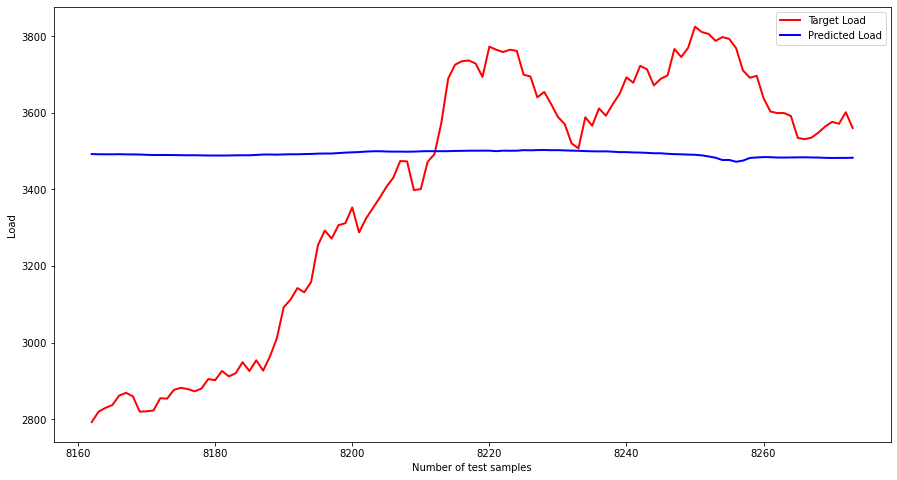

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

8.978510816968921


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -3.834431
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8162  279140.868840
8163  281848.479890
8164  282851.288249
8165  283553.251806
8166  286060.237337
...             ...
8269  356350.475664
8270  357553.653749
8271  357052.328648
8272  360060.242377
8273  355949.410906

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8162  489771.214331
8163  451857.961511
8164  438376.816322
8165  429077.770700
8166  397217.717296
...             ...
8269    6710.447638
8270    8888.111070
8271    7936.139556
8272   14189.663640
8273    6025.396988

[112 rows x 1 columns]
y_t+100    123054.161329
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    350.790766
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3492.4958]
[3491.927]
[3491.8472]
[3491.8037]
[3492.0747]
[3491.6558]
[3491.5066]
[3491.2798]
[3490.5264]
[3489.9253]
[3490.11]
[3490.0247]
[3489.8416]
[3489.5334]
[3489.2756]
[3489.3438]
[3489.0547]
[3488.6782]
[3488.6895]
[3488.595]
[3488.7837]
[3489.1655]
[3489.2803]
[3489.353]
[3490.141]
[3491.1873]
[3491.3699]
[3490.9216]
[3491.5051]
[3491.9268]
[3491.8882]
[3492.353]
[3492.748]
[3493.6147]
[3493.8584]
[3493.905]
[3495.0557]
[3496.2078]
[3497.0007]
[3497.6743]
[3498.9407]
[3499.765]
[3499.796]
[3499.1396]
[3498.772]
[3498.8938]
[3498.5718]
[3498.86]
[3499.6555]
[3499.988]
[3499.987]
[3499.8916]
[3500.055]
[3500.5842]
[3500.8838]
[3501.2314]
[3501.2969]
[3501.3826]
[3501.3167]
[3500.0552]
[3501.3118]
[3501.141]
[3501.2302]
[3502.7053]
[3502.2686]
[3502.8599]
[3503.023]
[3502.5898]
[3502.6836]
[3502.0356]
[3501.4053]
[3500.961]
[3500.2302]
[3499.694]
[3499.4326]
[3499.5112]
[3498.666]
[3497.5115]
[3497.45]
[3496.6843]
[3496.3494]
[3495.539]
[3494.5742]
[3494.549]
[3493.1313]
[3492.